In [3]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df.shape

(200, 4)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

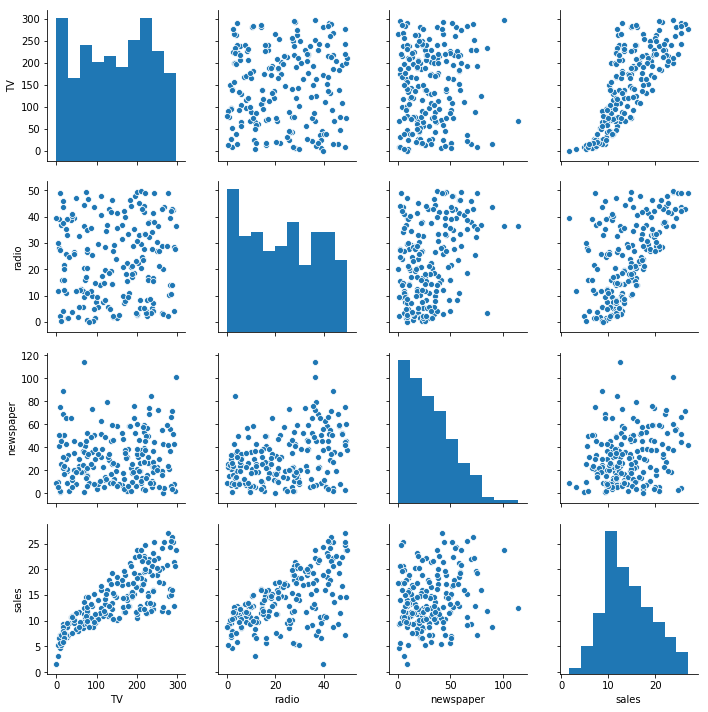

In [9]:
sns.pairplot(df)
# The pairs plot builds on two basic figures, the histogram and the scatter plot.
# The histogram on the diagonal allows us to see the distribution of a single variable 
# while the scatter plots on the upper and lower triangles show the relationship between two variables.

C:\Users\DBREDDY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


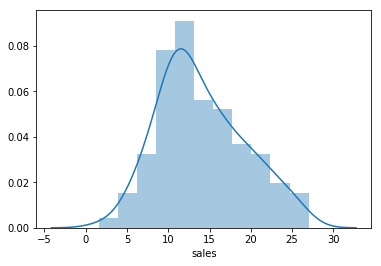

In [10]:
sns.distplot(df['sales'])
# univariate distribution ,this will draw a histogram and fit a kernel density estimate (KDE). 
# The kernel density estimate can be a useful tool for plotting the shape of a distribution

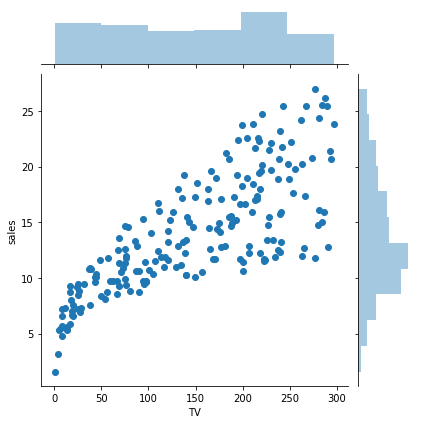

In [11]:
sns.jointplot(x=df['TV'], y=df['sales'], data=df)

C:\Users\DBREDDY\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


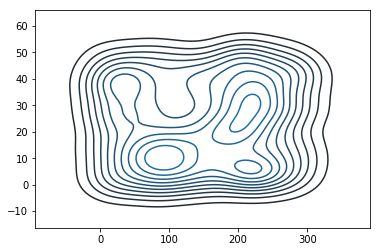

In [12]:
sns.kdeplot(df)

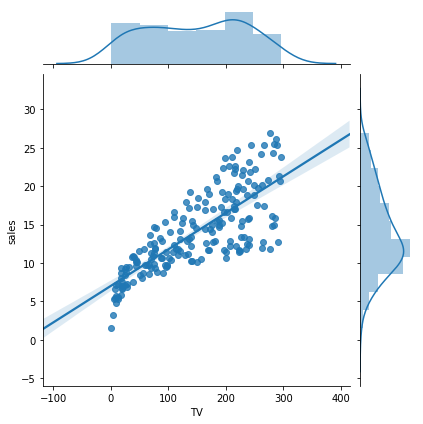

In [13]:
sns.jointplot(x=df['TV'], y=df['sales'], data=df, kind='reg')
# kind = 'hex'

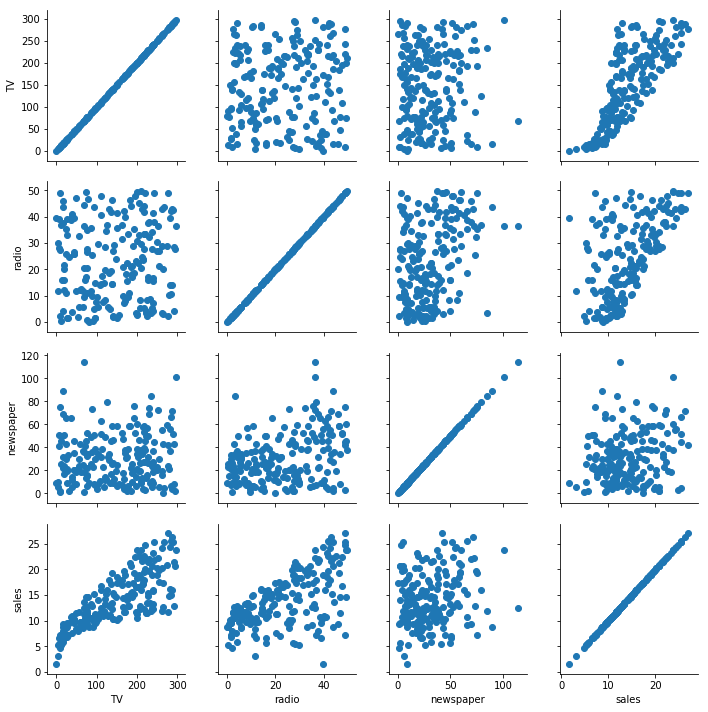

In [14]:
grids = sns.PairGrid(df)
grids.map(plt.scatter)

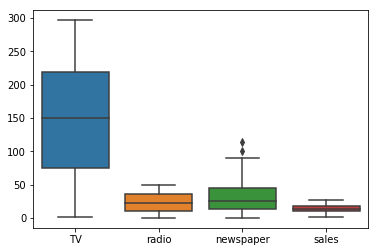

In [15]:
sns.boxplot(data = df,orient = 'v')

In [17]:
max(df['newspaper'])

114.0

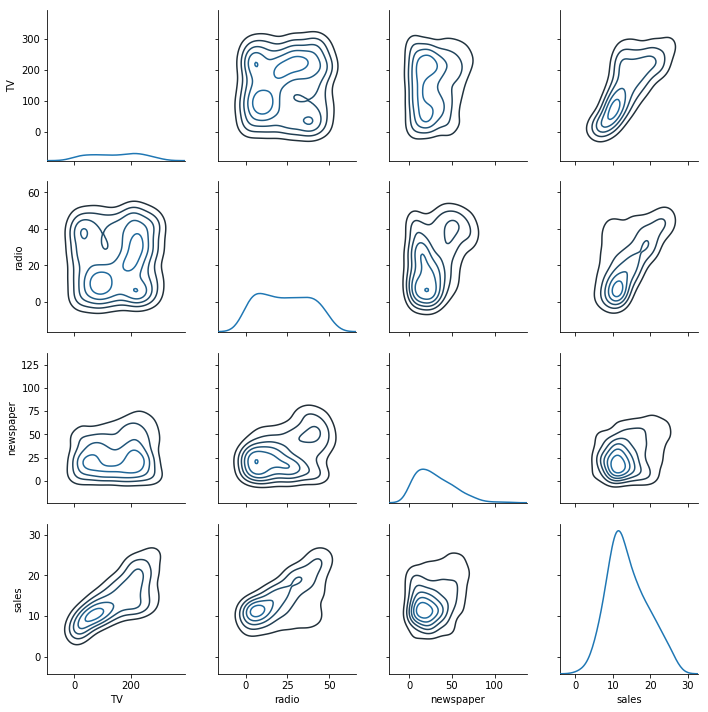

In [18]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

In [19]:
df_corr = df.corr()

In [20]:
df_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


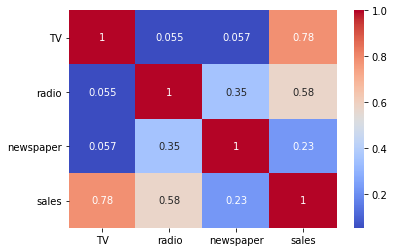

In [21]:
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
# cmap = YlGnBu

In [22]:
# Feature or input or independent variables
X = df[['TV', 'radio', 'newspaper']]
print(X.head())
X.shape

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


(200, 3)

In [23]:
# Target or Response or output or dependent variable
y = df['sales']
print(y.head())
y.shape

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


(200,)

In [24]:
# # split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
print(df.shape)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4)
(200, 3)
(200,)
(140, 3)
(60, 3)
(140,)
(60,)


In [25]:
# import package from scikit learn for doing linear regression
from sklearn.linear_model import LinearRegression

In [26]:
# instantiate a new object of the class
model = LinearRegression()
print(dir(model))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_decision_function', '_estimator_type', '_get_param_names', '_preprocess_data', '_set_intercept', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'n_jobs', 'normalize', 'predict', 'score', 'set_params']


In [27]:
# fit the model to the training data (learn the coefficients)
model.fit(X_train, y_train)
print(dir(model.fit(X_train, y_train)))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_decision_function', '_estimator_type', '_get_param_names', '_preprocess_data', '_residues', '_set_intercept', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_jobs', 'normalize', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [28]:
# Interpreting model coefficients
print(model.intercept_)
print(model.coef_)

2.937215734690609
[0.04695205 0.17658644 0.00185115]


In [29]:
col_names = []
for i in X_train.columns:
    col_names.append(i)
print(col_names)
coeff = model.coef_.tolist()
print(coeff)
data_col_coeff = {'Name':col_names,'Coeff_col':coeff}
df_coeff = pd.DataFrame(data_col_coeff)
df_coeff

['TV', 'radio', 'newspaper']
[0.046952047768484634, 0.17658643526817372, 0.001851153318892268]


,Name,Coeff_col
0,TV,0.046952
1,radio,0.176586
2,newspaper,0.001851


In [30]:
# make predictions on the testing set
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(60,)
[21.66318307 16.44137936  7.69144625 17.9163172  18.67047113 23.79199311
 16.2825425  13.44138683  9.15294033 17.32475313 14.43922876  9.84019547
 17.26329945 16.62853147 15.09158705 15.50173894 12.43404074 17.32591521
 11.04327486 18.05652777  9.35309526 12.79465958  8.73413846 10.47225333
 11.38216042 15.02658554  9.7406823  19.44676903 18.19211174 17.20178728
 21.56359539 14.70484262 16.2635213  12.37098906 19.97059316 15.36768988
 14.00399515 10.0772945  20.91891557  7.43833283  3.67031166  7.27760354
  5.99523188 18.41497546  8.31868226 14.1090252  14.93697583 20.35882814
 20.56271636 19.55380813 24.10360923 14.84985778  6.71474914 19.77761567
 18.93996367 12.5109195  14.20052652  6.10844697 15.3695344   9.56769111]


In [34]:
print(X_test.head())
print(y_test.head())

        TV  radio  newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64


Calculating the metrics like R2 , MAE , MSE , RMSE 

In [37]:
# Model evaluation metrics for regression
from sklearn import metrics
print(dir(metrics))
print("__________________________________________________")
print(metrics.mean_absolute_error(y_test, y_pred))
print("__________________________________________________")
print(metrics.mean_squared_error(y_test, y_pred))
print("__________________________________________________")
import numpy as np
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("__________________________________________________")
print(metrics.r2_score(y_test, y_pred))
print("__________________________________________________")
print(metrics.median_absolute_error(y_test, y_pred))
print("__________________________________________________")
print(metrics.explained_variance_score(y_test, y_pred))
print("__________________________________________________")
print(metrics.mean_squared_log_error(y_test, y_pred))



['SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mutual_info_score', 'normalized_mutu

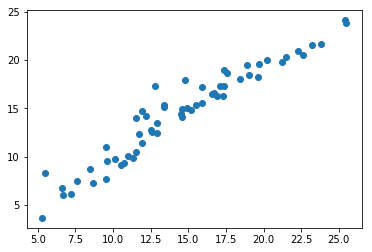

In [38]:
plt.scatter(y_test,y_pred)


C:\Users\DBREDDY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


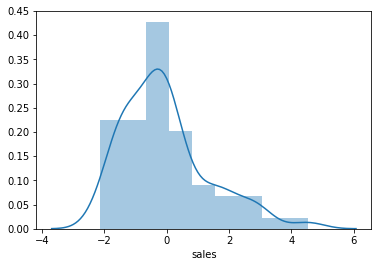

In [39]:
# Residual analysis
resd = y_pred - y_test
sns.distplot(resd)
# residuals should be normally distributed

In [40]:
np.abs(df_corr['sales']).sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [41]:
X_op = df[['TV', 'radio']]
y = df['sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_op, y, test_size = 0.3, random_state=1)
print(df.shape)
print(X_op.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(200, 4)
(200, 2)
(200,)
(140, 2)
(60, 2)
(140,)
(60,)


In [42]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
print(model1.intercept_)
print(model1.coef_)

2.9647671191401574
[0.04697554 0.17765046]


In [43]:
y_pred = model1.predict(X_test)
print(y_pred.shape)
print(y_pred)

(60,)
[21.6786746  16.43892004  7.70903733 17.92158421 18.67111499 23.74835071
 16.24962798 13.37657045  9.12364788 17.27585015 14.40513872  9.85730919
 17.31402746 16.61437382 15.02857874 15.42489496 12.42021473 17.34892466
 11.09570896 18.10320281  9.38655615 12.65171582  8.70947008 10.49704698
 11.35942404 15.03043294  9.73268033 19.46660993 18.26160716 17.21035792
 21.60669421 14.58454377 16.32136242 12.3456783  19.99853614 15.38120487
 14.01613968 10.05601014 20.94792024  7.45626202  3.65120693  7.26465144
  5.99278035 18.39717578  8.2996665  14.13011074 14.95229617 20.37261349
 20.60678937 19.48376432 24.08819667 14.89416249  6.71850002 19.74995269
 18.99448081 12.52042181 14.18823598  6.09331077 15.39558485  9.58586241]


In [44]:
print(metrics.r2_score(y_test, y_pred)) # previously = 0.9224605706201434

0.9230321850256801


In [45]:
print(0.9230321850256801-0.9224605706201434)

0.0005716144055366579


practice the linear regression for boston house price prediction problem 


you can get the csv file input data from google 